<a href="https://colab.research.google.com/github/glaucio-rocha/ciencia_de_dados/blob/main/C%C3%B3pia_de_MVP_Sprint_2_ML_Glaucio_Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning e Deep Learning (Sprint 2)
## Ciência de Dados & Analytics
### Aluno: Glaucio A. Rocha
### Entrega: 2023-07-23
---

## Parte 1 - Machine Learning

### 1.1 Definição do Problema
#### 1.1.1 Descrição do problema

#### 1.1.2 Premissas e hipóteses

#### 1.1.3 Restrições e condições



#### 1.1.4 Descrição do dataset

In [3]:
# Preparação do ambiente
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from joblib import parallel_backend


In [11]:
# Importação do dataset
url = "https://raw.githubusercontent.com/anushamanur/Wilt/master/training.csv"
url2 = "https://raw.githubusercontent.com/anushamanur/Wilt/master/testing.csv"

colunas = ['label','GLCM_Pan','Mean_G','Mean_R','Mean_NIR','SD_Pan']


# Lê o arquivo
dataset = pd.read_csv(url, header=None, names=colunas)
dataset2 = pd.read_csv(url2, header=None, names=colunas)

dataset2.head()

,label,GLCM_Pan,Mean_G,Mean_R,Mean_NIR,SD_Pan
0,0,109.828571,183.700000,82.950000,251.750000,16.079412
1,0,130.284483,212.637931,96.896552,482.396552,21.210295
2,0,131.386555,185.466667,85.466667,419.666667,13.339998
3,0,141.345098,180.875000,81.500000,348.062500,18.213577
4,1,121.383408,218.357143,112.017857,426.607143,19.083196


### 1.2 Preparação dos dados



#### 1.2.1 Separação dos dados (treino e teste)

In [12]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train = dataset.iloc[:, 1:]  # Todas as colunas, exceto a primeira (alvo)
y_train = dataset.iloc[:, 0]   # Primeira coluna (alvo)

X_test = dataset2.iloc[:, 1:]  # Todas as colunas, exceto a primeira (alvo)
y_test = dataset2.iloc[:, 0]   # Primeira coluna (alvo)


# Criar conjuntos de treino e teste usando train_test_split do sklearn
# Vamos usar 80% dos dados para treino e 20% para teste, mas você pode ajustar esses valores conforme necessário.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# Parâmetros e partições da validação cruzada
scoring = 'recall'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [14]:
y_train


0       1
1       1
2       1
3       1
4       1
       ..
4334    0
4335    0
4336    0
4337    0
4338    0
Name: label, Length: 4339, dtype: int64

#### 1.2.2 Validação cruzada

#### 1.2.3 Transformação de dados

#### 1.2.4 _Feature selection_

### 1.3 Modelagem e treinamento



#### 1.3.1 Seleção de algoritmos

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

LR: 0.605714 (0.172757)
KNN: 0.542857 (0.123883)
CART: 0.725714 (0.185790)
NB: 0.243810 (0.055729)
SVM: 0.000000 (0.000000)
RF: 0.685714 (0.131138)
ET: 0.702857 (0.066911)
Ada: 0.740952 (0.136081)
GB: 0.768571 (0.075689)


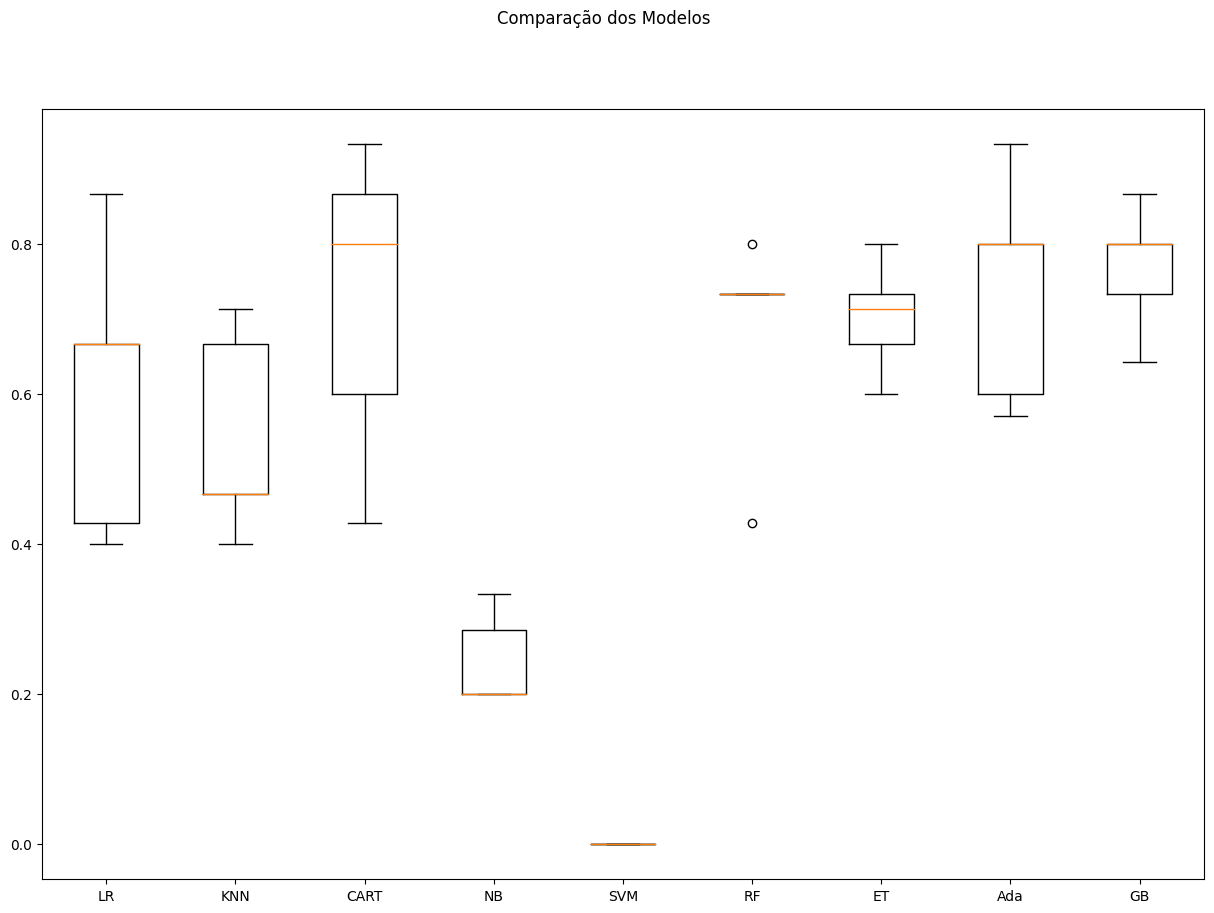

In [16]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

num_trees = 100
max_features = 3

# Criando os ensembles e adicionando-os na lista de modelos
#models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
#models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#### 1.3.2 Avaliação do treinamento

#### 1.3.3 Otimização de hiperparâmetros

In [21]:
# Tuning do RF

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
# ada = ('Ada', AdaBoostClassifier())

gb = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gb])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, gb])))

# param_grid = {
#     'RF__n_estimators': [10, 50, 100]      # Número de árvores na floresta
#  }

param_grid = {"GB__n_estimators": [800, 900, 1000, 1200],
              "GB__max_depth": [2, 3],
              "GB__subsample": [0.6, 0.7, 0.8],
              "GB__min_samples_split": [2, 3],
              "GB__max_features": ["sqrt", "log2"],
              "GB__learning_rate": [0.01, 0.015, 0.018, 0.02, 0.025]}


# param_grid = {
#     'Ada__n_estimators': [50, 100, 150],      # Número de estimadores no AdaBoost
#     'Ada__learning_rate': [0.1, 0.5, 1.0],    # Taxa de aprendizado para cada estimador
#     # 'Ada__base_estimator': [None],            # Classificador base (padrão é DecisionTreeClassifier)
#     'Ada__algorithm': ['SAMME', 'SAMME.R'],    # Algoritmo para atualizar os pesos das amostras
#     'Ada__random_state': [42]                 # Semente aleatória para reprodutibilidade
# }

# param_grid = {
#     'RF__n_estimators': [10, 50, 100],      # Número de árvores na floresta
#     'RF__max_features': ['auto', 'sqrt',2,3],   # Número máximo de features a considerar em cada split
#     'RF__max_depth': [2, 3, 5]              # Profundidade máxima da árvore
# }

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=10)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: GB-orig - Melhor: 0.740952 usando {'GB__learning_rate': 0.025, 'GB__max_depth': 3, 'GB__max_features': 'sqrt', 'GB__min_samples_split': 3, 'GB__n_estimators': 1200, 'GB__subsample': 0.8}
Sem tratamento de missings: GB-padr - Melhor: 0.728571 usando {'GB__learning_rate': 0.025, 'GB__max_depth': 3, 'GB__max_features': 'log2', 'GB__min_samples_split': 2, 'GB__n_estimators': 1000, 'GB__subsample': 0.8}
Sem tratamento de missings: GB-norm - Melhor: 0.727619 usando {'GB__learning_rate': 0.025, 'GB__max_depth': 3, 'GB__max_features': 'log2', 'GB__min_samples_split': 3, 'GB__n_estimators': 800, 'GB__subsample': 0.8}


### 1.4 Análise de Resultados

#### 1.4.1 Métricas de avaliação

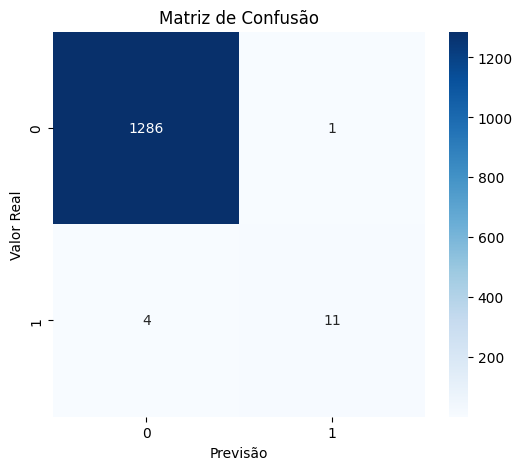

In [ ]:
from sklearn.metrics import confusion_matrix


# model = RandomForestClassifier(max_depth=5, max_features=3, n_estimators=50)
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model = AdaBoostClassifier(algorithm =  'SAMME.R', learning_rate = 1.0, n_estimators = 50, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar e plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

#### 1.4.2 Teste do modelo

#### 1.4.3 Avaliação do modelo

#### 1.4.4 Conclusões

#### 1.4.5 Próximos passos

---

## Parte 2 - Deep Learning

### 2.1 Definição do Problema
#### 2.1.1 Descrição do problema

#### 2.1.2 Premissas e hipóteses

#### 2.1.3 Restrições e condições



#### 2.1.4 Descrição do dataset

In [ ]:
# Preparação do ambiente (Deep Learning)



In [ ]:
# Importação do dataset

### 2.2 Preparação dos dados



#### 2.2.1 Separação dos dados (treino e teste)

#### 2.2.2 Validação cruzada

#### 2.2.3 Transformação de dados

#### 2.2.4 _Feature selection_

### 2.3 Modelagem e treinamento



#### 2.3.1 Seleção de algoritmos

#### 2.3.2 Avaliação do treinamento

#### 2.3.3 Otimização de hiperparâmetros

### 2.4 Análise de Resultados

#### 2.4.1 Métricas de avaliação

#### 2.4.2 Teste do modelo

#### 2.4.3 Avaliação do modelo

#### 2.4.4 Conclusões

#### 2.4.5 Próximos passos